In [1]:
# install.packages("ggplot2")
library(ggplot2)

# Load the data
data(mtcars)
df <- mtcars[, c("mpg", "cyl", "wt")]
# Convert cyl to a factor variable
df$cyl <- as.factor(df$cyl)
head(df)

,mpg,cyl,wt
,<dbl>,<fct>,<dbl>
Mazda RX4,21.0,6,2.620
Mazda RX4 Wag,21.0,6,2.875
Datsun 710,22.8,4,2.320
Hornet 4 Drive,21.4,6,3.215
Hornet Sportabout,18.7,8,3.440
Valiant,18.1,6,3.460


```{list-table} This table title
:header-rows: 1
:name: example-table

* - Training
  - Validation
* - 0
  - 5
* - 13720
  - 2744
```

# Introducción a la probabilidad

Para muchas personas, cuando piensan en estadística se les viene esto a la mente: calcular promedios, recopilar datos, elaborar gráficos y ponerlos todos en un informe en algún lugar. Mas o menos como coleccionar sellos o cucharillas, pero con números. Sin embargo, las estadística cubre mucho más que eso. De hecho, la estadística descriptiva es una de las partes más pequeñas de la estadística, y una de las menos poderosas (en cuanto a las conclusiones que puede aportar). La parte más importante y más útil de la estadística es aquella que que permite hacer *inferencias*  sobre los datos. 

Una vez contemplada las estadística en estos términos, -que la estadística está ahí para ayudarnos a hacer inferencias a partir de datos- podemos ver ejemplos de ella en todas partes. Por ejemplo, aquí hay un pequeño extracto de un periódico mexicano:

> "Tengo un trabajo difícil", dijo el Presidente mexicano en respuesta a una encuesta que encontró que su gobierno ha pasado de gozar los mayores índices de popularidad en la historia (>70%) a un 38 por ciento. 
Este tipo de comentarios suele pasar como completamente irrelevante en los periódicos o en la vida cotidiana, pero pensemos brevemento sobre lo que implica. Una compañía encuestadora ha realizado una encuesta, presumiblemente una muy grande porque tiene los medios y puede permitírselo. Imaginemos que llamaron a 1.000 votantes al azar, y 380 (38\%) de ellos afirmaron que tenían la intención de votar por el Presidente. En las últimas elecciones federals, la Instituto Electoral Mexicano confirmó la participación de 56.611.027 votantes; por lo tanto, las opiniones de los 56.610.027 votantes restantes (aproximadamente el 99.998\%  de los votantes) siguen siendo desconocidas para la encuestadora (y para nosotros). Aún suponiendo que nadie mintió en la encuesta, lo único que podemos decir con un 100\% de seguridad es que el verdadero voto primario al Presidente está en algún lugar entre 380/56.611.027 (aproximadamente el 0.0007\%) y 56.610.307/56.611.027 (alrededor del 99.9987\%), lo cual no aporta mucho. Entonces, ¿sobre qué base es legítimo para la empresa encuestadora, el periódico y el lectores concluir que la intención de voto al Presidente mexicano fue de sólo el 38\%?

La respuesta a la pregunta es bastante obvia: si llamo a 1.000 personas al azar, y 380 de ellas dicen tienen la intención de votar por el Presidente, entonces parece muy poco probable que estas sean las *únicas* 380 personas del todo el público votante que realmente tiene la intención de hacerlo. En otras palabras, suponemos que los datos recopilados por la empresa encuestadora son bastante representativos de la población en general. ¿Pero qué tan representativo? ¿Nos sorprendería descubrir que la verdadera intención de voto es en realidad del 34\%? ¿39\%? ¿57\%? En este punto nuestración intuición comienza a romperse un poco. Nadie se sorprendería si fuese el 34\%, y todos lo harían con un 57\%, pero es un poco difícil decir si el 39\% es plausible. Necesitamos herramientas más poderosas que solo el mirar los números y adivinar. 

**_La estadística inferencial_**  proporciona las herramientas que necesitamos para responder a este tipo de preguntas, y ya que este tipo de preguntas se encuentran en el corazón del quehacer científico, ocupan una parte sustancial de cada curso introductorio sobre estadística y métodos de investigación. Sin embargo, la teoría sobre la estadística inferencial está construida sobre la **_teoría de probabilidad_**.  Y es a la teoría de la probabilidad a la que ahora debemos prestar atención. La discusión de la teoría de la probabilidad en esta asignatura será básicamente de fondo: no hay mucho contenido estadístico *per se* en este capítulo. Sin embargo, debido a que gran parte de la estadística se sustenta en la teoría de la probabilidad, merece la pena ir cubriendo algunos de los conceptos básicos.


## ¿Cómo de diferentes son la probabilidad y la estadística?{#probstats}

Antes de comenzar a hablar sobre la teoría de la probabilidad, es útil pensar un momento en la relación que existe entre probabilidad y estadística. Las dos disciplinas están estrechamente relacionadas, pero no son idénticas. La teoría de la probabilidad es "la doctrina de las posibilidades". Es una rama de las matemáticas que te dice con qué frecuencia sucederán diferentes tipos de eventos. Por ejemplo, todas estas preguntas son cosas que puedes responder usando la teoría de la probabilidad:

- ¿Cuáles son las probabilidades de que al lanzar una moneda salga cara 10 veces seguidas? 
- Si lanzo dos dados de seis caras, ¿qué probabilidad hay de que tire dos seises? 
- ¿Qué probabilidad hay de que cinco cartas extraídas de un mazo perfectamente barajado sean todas de corazones? 
- ¿Cuál es la probabilidad de que gane la lotería?

Hay que tener en cuenta que todas estas preguntas tienen algo en común. En cada caso, existe y se conoce una "verdad sobre el mundo", y la pregunta se refiere más bien al "qué tipo de eventos" sucederán. En la primera pregunta que *sé* que la moneda es justa (no es más pesada por uno de los lados, sesgando el resultado), por lo que hay un 50% de probabilidad de que cualquier lanzamiento de moneda salga cara. En la segunda pregunta, *sé* que la probabilidad de sacar un 6 en un solo dado es de 1 en 6. En la tercera pregunta *sé* que la baraja se baraja correctamente (no hay un acomodo de cartas). Y en la cuarta pregunta, *sé* que la lotería sigue unas reglas específicas. El punto clave aquí es que las preguntas probabilísticas comienzan con un **_modelo_** conocido del mundo, y usamos ese modelo para hacer algunos cálculos. El modelo subyacente puede ser bastante simple. Por ejemplo, en el ejemplo de lanzar monedas, podemos escribir el modelo de esta manera:
$$
P(\mbox{cara}) = 0.5
$$
que puedes leer como "la probabilidad de que salga cara es 0.5". Como veremos más adelante, de la misma manera que los porcentajes son números que van del 0\% al 100\%, las probabilidades son solo números que van del 0 al 1. Cuando usamos este modelo de probabilidad para responder a la primera pregunta, en realidad no sé exactamente qué va a ocurrir. Tal vez obtenga 10 caras, como dice la pregunta. Pero quizás salgan sólo tres caras. Esta es la clave: con la teoría de la probabilidad, se conoce el *modelo*, pero no los *datos*.

Hemos visto lo que es la probabilidad. ¿Qué hay de la estadística? Las preguntas en estadística funcionan al revés. En estadística, nosotros *no* sabemos la verdad sobre el mundo. Todo lo que tenemos son los datos, y es a partir de esos datos que queremos *aprender* sobre la verdad del mundo. Las preguntas estadísticas tienden a parecerse más a estas:  

- Si mi amigo lanza una moneda 10 veces y obtiene 10 caras, ¿me está engañando? 
- Si las primeras cinco cartas de la parte superior del mazo son todas de corazones, ¿qué tan probable es que se haya barajado el mazo? 
- Si el hijo del comisionado de la lotería gana la lotería, ¿qué tan probable es que el sorteo esté amañado?

Esta vez, lo único que tenemos son datos. Lo que *sé*  es que vi a mi amigo lanzar la moneda 10 veces y salió cara en cada una de las veces. Y lo que quiero es **_inferir_** si debería concluir que lo que acabo de ver es en realidad una moneda justa lanzada 10 veces seguidas, o si debería sospechar que mi amigo me está jugando una mala pasada. Los datos que tengo se ven así (cada C es una cara):
```
C C C C C C C C C C C
```
y lo que estoy tratando de hacer es averiguar en qué "modelo de verdad del mundo" debería confiar. Si la moneda es justa, entonces el modelo que debo aceptar es uno que diga que la probabilidad de que salga cara es 0.5; es decir,  $P(\mbox{cara}) = 0.5$. Si la moneda no es justa, entonces debo concluir que la probabilidad de que salga cara *no* es 0.5, lo cual escribiríamos como $P(\mbox{cara}) \neq 0.5$. En otras palabras, el objetivo de la inferencia estadística es decidir cual de estos modelos de probabilidad es el correcto. Vemos pues, que una pregunta en estadística no es la misma que una pregunta en probabilidad, pero están íntimamente conectados entre sí. Es por ello que una buena introducción a la teoría estadística comenzará con una discusión sobre qué es la probabilidad y cómo funciona.

## ¿Qué significa la probabilidad?{#probmeaning}

Comencemos con la primera de estas preguntas. ¿Qué es la "probabilidad"? Puede parecer sorprendente, pero mientras que los estadísticos y matemáticos (en su mayoría) están de acuerdo sobre cuáles son las *reglas* de la probabilidad, hay mucho menos consenso sobre lo que realmente *significa* la palabra. Parece extraño porque todos usemos con soltura palabras como "posibilidad", "probabilidad", "posible" y "probable", y además no parece que deba ser una pregunta difícil de responder. Si tuvieramos que explicar el concepto de "probabilidad" a un niño de cinco años, podríamos hacerlo sin muchos problemas. Pero si alguna vez lo has intentando en la vida real, podrías terminar esa conversación sintiendo que no lo has hecho muy bien y que (como con muchos conceptos cotidianos) resulta que *realmente* no sabemos de qué se trata.

### La visión frecuentista

El primero de los dos enfoques principales a la teoría de la probabilidad, y el más dominante en estadística, se le conoce como la **_visión frecuentista_**, y define a la probabilidad como una **_ frecuencia a largo plazo_**. Supongamos que queremos intentar lanzar una moneda justa, una y otra vez. Por definición, esta es una moneda que tiene una $P(Cara) = 0.5$. ¿Qué resultado podremos observar? Una posibilidad es que los primeros 20 lanzamientos se vean así (donde C es cara y X cruz):

In [ ]:
```
X,C,C,C,C,X,X,C,C,C,C,X,C,C,X,X,X,X,X,C
```

X,C,C,C,C,X,X,C,C,C,C,X,C,C,X,X,X,X,X,C

En este caso, en 11 de los 20 lanzamientos (55\%) salió cara. Ahora supongamos que he ido guardando un registro con el número de caras (que llamaré $N_C$) que han salido, a lo largo de las primeras $N$ lanzadas de moneda, además de calcular la proporción de caras $N_C / N$ con cada registro. Este es el resultado que obtendría:

In [2]:
knitr::kable(data.frame(stringsAsFactors=FALSE,
`Número de lanzamientos` = c(1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10, 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20),
`Número de caras` = c( 0 , 1 , 2 , 3 , 4 , 4 , 4 , 5 , 6 , 7,  8  ,  8 ,  9 , 10 , 10 , 10 , 10 , 10 , 10 , 11 ), 
`Proporción` = c( .00 , .50 , .67 , .75 , .80 , .67 , .57 , .63 , .67 , .70, .73 , .67 , .69 , .71 , .67 ,  .63 , .59 , .56 , .53 , .55)))




| Número.de.lanzamientos| Número.de.caras| Proporción|
|----------------------:|---------------:|----------:|
|                      1|               0|       0.00|
|                      2|               1|       0.50|
|                      3|               2|       0.67|
|                      4|               3|       0.75|
|                      5|               4|       0.80|
|                      6|               4|       0.67|
|                      7|               4|       0.57|
|                      8|               5|       0.63|
|                      9|               6|       0.67|
|                     10|               7|       0.70|
|                     11|               8|       0.73|
|                     12|               8|       0.67|
|                     13|               9|       0.69|
|                     14|              10|       0.71|
|                     15|              10|       0.67|
|                     16|              10|       0.63|
|       

Tengamos en cuenta que al comienzo de esta secuencia, la *proporción* de caras fluctúa enormemente, comenzando en .00 y subiendo tan alto como .80. Conforme aumenta el número de lanzamientos, uno tiene la impresión de que este efecto se amortigua un poco, mientras que los valores se aproximan cada vez más a la respuesta "correcta" de .50. Esta es la definición frecuentista de probabilidad en pocas palabras: lanzar una moneda justa una y otra vez, y a medida que $N$ crece  (se acerca al infinito, denotado como $N\rightarrow \infty$), la proporción de caras convergerá en el 50\%. Tecnicismos matemáticos aparte, cualitativamente hablando, es así es como los frecuentistas definen la probabilidad. Desafortunadamente, no tengo un número infinito de monedas, o la paciencia infinita requerida para lanzar una moneda un número infinito de veces. Sin embargo, existen los ordenadores, y los ordenadores se destacan por la ejecución repetitiva de tareas sin sentido como esta. Entonces, al simular 1.000 lanzamientos de moneda y repetir este procesos 4 veces (para darle solidez a los resultados), podemos ver qué sucede con la proporción $N_C / N$ a medida que $N$ aumenta. Los resultados se muestran en la Figura \@ref(fig:frequentistprobability) aunque también puedes hacer tú la simulación haciendo click [aquí](https://leudave.shinyapps.io/cara_cruz/). Podemos apreciar que la *proporción de caras observadas* deja de fluctuar conforme aumenta el número de lanzamientos; cuando lo hace, el número que finalmente obtenemos es el verdadera probabilidad de salga cara.

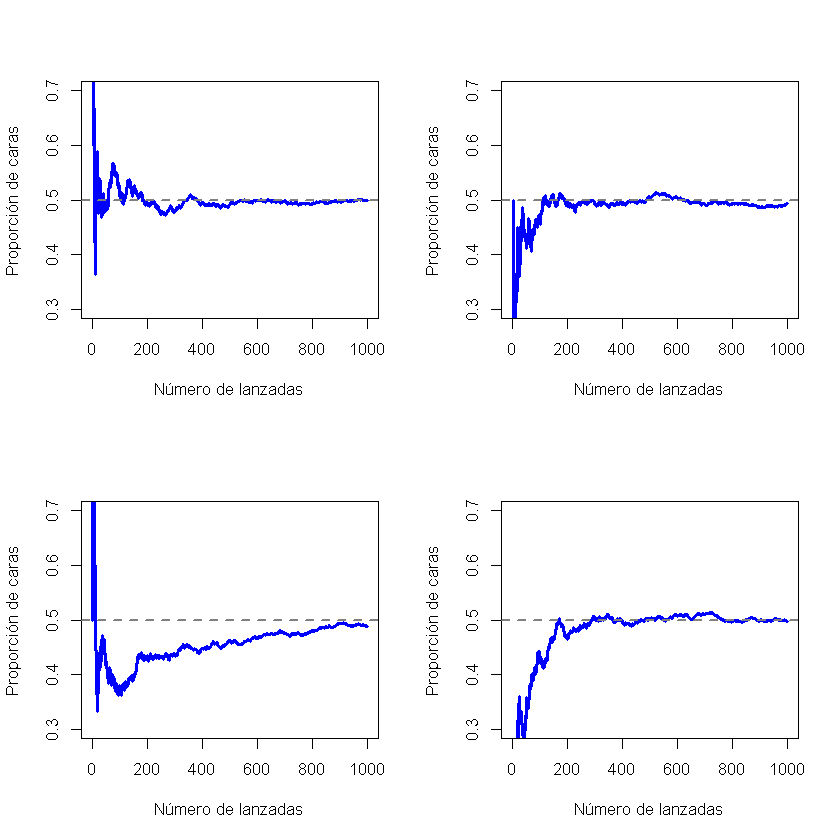

In [3]:
emphCol <- rgb(0,0,1)
emphColLight <- rgb(.5,.5,1)
emphGrey <- grey(.5)
eps <- TRUE
colour <- TRUE
	width <- 12
	height <- 8
	def.par <- par(no.readonly = TRUE)
	layout( matrix(1:4,2,2) )
	for( i in 1:4 ) {
		
		X <- as.numeric( runif(1000) > .5 )
		X <- cumsum(X) / (1:1000)
		plot( 1:1000, X, type="l", ylim=c(.3,.7), col=ifelse(colour,emphCol,emphGrey),
			xlab = "Número de lanzadas", ylab = "Proporción de caras", lwd=3
			) 
		abline(h=.5,lty=2,col=emphGrey,lwd=2)
		
	}
	par(def.par)#- reset to default

La definición frecuentista de probabilidad tiene algunas características que le hacen deseable. En primer lugar, es objetivo: la probabilidad de un evento se basa *necesariamente* en el mundo real. La única forma en que declaraciones de probabilidad puedan tener sentido es si se refieren a (una secuencia de) eventos que ocurren en el universo físico. En segundo lugar, es inequívoco: dos personas que miran como se desarrolla la misma secuencia de eventos, al tratar de calcular la probabilidad de un evento, inevitablemente deberán llegar a la misma respuesta. Sin embargo, también tiene algunas características no tan deseables. En primer lugar, no existen secuencias infinitas en el mundo físico. Supongamos que has encontrado una moneda en el suelo y has comenzado a lanzarla varias veces. Cada vez que aterriza, impacta en el suelo. Cada impacto daña un poco la moneda; eventualmente, la moneda será inutilizable. Entonces, uno podría preguntarse si realmente tiene sentido fingir que una secuencia "infinita" de lanzamientos de monedas es un concepto significativo u objetivo. No podemos decir que una "secuencia infinita" de eventos es algo real en el universo físico, porque el universo físico no permite nada infinito. Así, podemos ver que la definición frecuentista tiene un alcance limitado. Hay muchas cosas por ahí a las que los seres humanos estamos felices de asignar probabilidades en el día a día, pero que no pueden (ni siquiera en teoría) ser planteadas como una secuencia hipotética de eventos. Por ejemplo, si un meteorólogo aparece en televisión y dice: "la probabilidad de lluvia en Pamplona el 2 de noviembre del 2048 es del 60\%" nosotros podemos aceptarlo sin rechistar. Pero desde un punto de vista frecuentista, no queda tan claro cómo podemos definirlo. Sólo hay una ciudad de Pamplona (en Navarra), y sólo un 2 de noviembre del 2048. Aquí no hay una secuencia infinita de eventos, solo una cosa de una vez. La probabilidad frecuentista nos *prohíbe* hacer declaraciones de probabilidad sobre un solo evento. Desde la perspectiva frecuentista, lloverá mañana o o no lloverá; no hay una "probabilidad" que se pueda adjuntar a un sólo evento no repetible. Sin embargo, existen algunos trucos que los frecuentistas pueden utilizar para solucionar esta situación. Una posibilidad es que el meteorólogo en realidad nos quiera decir algo así: "Existe una categoría de días para la que predigo un 60\% probabilidad de lluvia; si miramos sólo esos días para los que hago esta predicción, entonces en el 60\%  de esos días lloverá realmente". Es un poco extraño y contradictorio pensarlo de esta manera, pero los frecuentistas hacen esto a veces. 

### La visión bayesiana

La alternativa a la visión frecuentista, la **_visión bayesiana_** de la probabilidad, a menudo se denomina visión subjetivista, y es una visión relativamente minoritaria entre los estadísticos, aunque ha ido ganando terreno constantemente a lo largo de las últimas décadas. Hay muchos formas de bayesianismo, lo que hace difícil decir exactamente cuál es "la" visión bayesiana. La forma más fácil de entender la probabilidad subjetiva es al definir la probabilidad de un evento como el **_grado de creencia_** que un agente inteligente y racional  asigna a la verdad de ese evento. Desde esa perspectiva, las probabilidades no existen en el mundo, sino más bien en los pensamientos y suposiciones de las personas y otros seres inteligentes. Sin embargo, para que este enfoque funcione, necesitamos una forma de operacionalizar este "grado de creencia". Una forma de hacerlo es formalizándolo en términos de una "apuesta racional" aunque existen muchas otras formas. Supongamos que creo que existe una probabilidad de que llueva mañana de un 60\%. Si alguien me hace una apuesta, si llueve mañana, gano \$5,  pero si no llueve, pierdo \$5. Claramente, desde mi punto de vista, esta es una buena apuesta. Por otro lado, si creo que la probabilidad de lluvia es sólo del 40\%, entonces es una mala apuesta. Por lo tanto, podemos poner en práctica la noción de una "probabilidad subjetiva" en términos de qué apuestas que estoy dispuesto a aceptar. 

¿Cuáles son las ventajas y desventajas del enfoque bayesiano? La principal ventaja es que le permite asignar probabilidades a cualquier evento. No esta limitado a aquellos eventos que son repetibles. La principal desventaja (para muchas personas) es que no podemos ser realmente objetivos - especificar una probabilidad requiere que especifiquemos la entidad que tiene el grado de creencia que estamos examinando. Esta entidad puede ser un humano, un extraterrestre, un robot o incluso un estadístico, pero tiene que ser un agente inteligente que sea capaz de creer en cosas. Para muchas personas esto representa un inconveniente: parece hacer que la probabilidad sea arbitraria. Si bien el enfoque bayesiano requiere que el agente en cuestión sea racional (es decir, que obedezca las reglas de la probabilidad), permite que todos tengan sus propias creencias; yo puedo creer que la moneda es justa mientras que otro no, aunque ambos seamos racionales. La visión frecuentista no permite que dos observadores atribuyan diferentes probabilidades al mismo evento: cuando eso sucede, al menos uno de ellos debe estar equivocado. La visión bayesiana no evita que esto ocurra. Dos observadores con diferentes conocimientos previos pueden tener creencias diferentes sobre el mismo evento. En otras palabras, mientras que la visión frecuentista se puede considerar como demasiado estrecha (prohíbe muchas cosas a las cuales queremos asignar probabilidades), la visión bayesiana puede resultar demasiado amplia (permite demasiadas diferencias entre observadores).


### ¿Cuál es la diferencia? ¿Y quién tiene razón?

Ahora que hemos visto ambas visiones estadísticas de forma independiente, es necesario compararlas. Regresemos al hipotético juego de fútbol de robots que comentamos comienzo del tema. ¿Que dirían un frecuentista y un bayesiano sobre las tres afirmaciones? ¿Qué enunciado sería la definición de probabilidad correcta para el frecuentista? ¿Y para el bayesiano? ¿Es posible que alguno de los enunciados no tenga sentido para cualquiera de los dos? Si entendemos ambas perspectivas, podemos intuir cómo responder a estas preguntas.

Entendiendo las diferencias, podemos preguntarnos a continuación cuál de dos enfoques es el *correcto*. Sin embargo, no existe una respuesta correcta. Matemáticamente hablando, no hay nada incorrecto sobre la forma en que los frecuentistas piensan sobre secuencias de eventos, ni hay nada incorrecto acerca de la forma en que los bayesianos definen las creencias de un agente racional. De hecho, si vamos al detalle, los bayesianos y los frecuentistas en realidad están de acuerdo en muchas cosas. Muchos métodos frecuentistas conducen a decisiones que los bayesianos pensarían que toma un agente racional. Muchos métodos bayesianos tienen buenas propiedades frecuentistas.

En cualquier caso, la mayor parte de los métodos y análisis estadísticos en la literatura se basan en el enfoque frecuentista. Por lo tanto, el objetivo de esta asignatura es cubrir aproximadamente el mismo temario que una clase típica de estadística de pregrado en ciencias de la educación, y si queremos entender las herramientas estadísticas utilizadas por la mayoría de los educadores en investigación, necesitaremos una buena comprensión de los métodos frecuentistas. 


## Teoría de probabilidad básica{#basicprobability}

A pesar de los argumentos ideológicos entre bayesianos y frecuentistas, existe un consenso más o menos generalizado sobre las reglas que la probabilidad debe obedecer. Hay muchas formas de abordar estas reglas. El enfoque más utilizado se basa en el trabajo de Andrey Kolmogorov, uno de los grandes matemáticos soviéticos del siglo XX. No entraremos mucho en detalle, pero aprenderemos en qué consisten y cómo utilizarlas a través del siguiente ejemplo.

### Introducción a las distribuciones de probabilidad

Un hecho comprobado sobre mi vida es que sólo tengo 5 pares de pantalones: tres pares de vaqueros, los pantalones de un traje y un par de pantalones de chándal. Lo más triste es que les he dado nombres: los llamo $X_1$, $X_2$, $X_3$, $X_4$ y $X_5$. Diariamente, por la mañana, elijo un único par de esos pantalones que voy a usar. Si yo tuviera que describir esta situación usando el lenguaje de la teoría de la probabilidad, me referiría a cada par de pantalones (es decir, a cada $X$) como un **_evento elemental_**.  La característica clave de estos eventos elementales es que cada vez que hacemos una observación (por ejemplo, cada vez que escojo un par de pantalones), el resultado será uno y solo uno de estos eventos. Como he dicho antes, siempre uso exactamente sólo un par de pantalones, así que mis pantalones cumplen con esta restricción. Del mismo modo, al conjunto de todos los eventos posibles se le denomina  **_espacio muestral_**. Siguiendo con el ejemplo, mi espacio muestral sería el armario que contiene los 5 pantalones.   

Bien, ahora que tenemos un espacio muestral (un armario), que está construido a partir de muchas posibles eventos elementales (pantalones), lo que queremos hacer es asignar una **_probabilidad_**  a cada uno de estos eventos elementales. Para un evento $X$, la probabilidad de ese evento $P(X)$ es un número que se encuentra entre 0 y 1. Cuanto mayor sea el valor de $P(X)$, más probable será que ocurra el evento. Entonces, por ejemplo, si $P(X) = 0$, significa que el evento $X$ es imposible (es decir, nunca uso esos pantalones). Por otro lado, si  $P(X) = 1$ significa que el evento $X$ es seguro que ocurra (es decir, siempre uso esos pantalones). Los valores de probabilidad intermedios, significan que a veces uso esos pantalones (y a veces no). Por ejemplo, una $P(X) = 0.5$ significa que uso esos pantalones la mitad de las veces.  

Llegados a este punto, lo siguiente que debemos entender es que "algo siempre sucede ". Cada vez que me pongo unos pantalones, realmente termino usando esos pantalones. Lo que esto significa en términos probabilísticos, es que las probabilidades de todos los eventos elementales siempre suman 1. Esto se conoce como la **_ley de probabilidad total_**. Si se cumplen estos requisitos (tenemos número $X$ de pantalones, cada par con una probabilidad $P(X)$ de usarlos que en total suman 1), entonces lo que tenemos es una **_distribución de probabilidad_**.Veamos un ejemplo de distribución de probabilidad.

In [ ]:
```{r echo=FALSE}
knitr::kable(data.frame(stringsAsFactors=FALSE,
`Pantalones` = c(  "Nombre" , "Probabilidad" ), 
`V. azules` = c(  "$X_1$" , "$P(X_1) = .5$" ),
`V. grises` = c(  "$X_2$ ", "$P(X_2) = .3$ "),
`V. negros` = c(  "$X_3$ ", "$P(X_3) = .1$" ),
`Traje negro` = c(  "$X_4$" , "$P(X_4) = 0$ "),
`Chándal azul` = c(  "$X_5$ ", "$P(X_5) = .1$")), "markdown", padding=0L)
```

Cada uno de estos eventos tiene una probabilidad que se encuentra entre 0 y 1, y si sumamos la probabilidad de todos eventos, suman 1. Incluso podemos dibujar un gráfico de barras para visualizar esta distribución, como se muestra en la Figura \@ref(fig:pantsprob). 

In [ ]:
```{r pantsprob, fig.cap="Demostración visual de la distribución de probabilidad de los \"pantalones\". Existen 5 \"eventos elementales\", que se corresponden con mis 5 pares de pantalones. Cada evento tiene una probabilidad de ocurrir: esta probabilidad es un número entre 0 y 1. La suma de estas probabilidades es 1.", echo=FALSE}
probabilities <- c( .5, .3, .1, 0, .1)
	eventNames <- c( "V. azules", "V. grises", "V. negros", 
					 "Traje negro", "Chándal azul" )
	
	# draw the plot
	barplot( 
		height= probabilities, 
		xlab = "Evento",
		ylab = "Probabilidad del evento",
		names.arg = eventNames,
		density = 10,
		col = ifelse(colour,emphCol,emphGrey)
	)
```

Es importante señalar que la teoría de probabilidades permite hablar acerca de eventos elementales pero también sobre los **_eventos no elementales_**. La forma más fácil de ilustrar este concepto es con un ejemplo. Siguiendo con el ejemplo de los pantalones, es perfectamente posible hablar sobre la probabilidad de usar vaqueros. Bajo esta premisa, podemos decir que el evento "yo uso vaqueros" es posible siempre y cuando ocurra alguno de los eventos elementales apropiados; en este caso "vaqueros azules", "vaqueros negros" o "vaqueros grises". En términos matemáticos, definimos al evento $E$ "vaqueros" como el conjunto de eventos elementales $(X_1, X_2, X_3)$. Si se produce alguno de estos eventos elementales, también podemos decir que $E$ ha ocurrido. Por lo tanto, podemos decir que la probabilidad $P(E)$ es simplemente la suma de esos tres eventos, así
$$
P(E) = P(X_1) + P(X_2) + P(X_3)
$$ 
y, dado que las probabilidades de los vaqueros azules, grises y negros son respectivamente .5, .3 y .1, la probabilidad total de usar vaqueros es igual a .9.

Todo esto parece obvio y simple. Sin embargo, a partir de estos simples comienzos, es posible construir algunas herramientas matemáticas más complejas y poderosas. En la siguiente Tabla se muestran algunas de las otras reglas que deben de cumplirse para poder calcular probabilidades. 


In [ ]:
```{r probrules, echo=FALSE}
knitr::kable(data.frame(stringsAsFactors=FALSE,
`Castellano` = c("No $A$", "$A$ o $B$", "$A$ y $B$"),
`Notacion` = c("$P(\\neg A)$", "$P(A \\cup B)$", "$P(A \\cap B)$"),
`Igual` = c("=", "=", "="),
`Formula` = c("$1-P(A)$", "$P(A) + P(B) - P(A \\cap B)$", "$P(A \\vert B) P(B)$")), "markdown", caption = "Algunas reglas básicas de probabilidad. Son importantes si se quiere entender la teoría de la probabilidad con un poco más de detalle y nos sirven para resolver algunos problemas de probabilidad.")
```

## La distribución binomial{#binomial}

Como hemos visto, las distribuciones de probabilidad pueden variar enormemente, por lo que existe un gran número de distribuciones posibles. Sin embargo, no todas son igual de importantes. Las distribuciones más importantes, y de las que hablaremos en esta asignatura son cinco: la distribución binomial, la distribución normal, la distribución $t$, la distribución $\chi^2$ ("chi-cuadrada") y la distribución $F$. Daremos una breve introducción a las cinco, prestando especial atención a las distribuciones binomial y normal. Comenzaremos con la distribución más simple de las cinco, la distribución binomial.

### Introducción al binomio

La teoría de la probabilidad se creó originalmente para intentar describir cómo funcionaban los juegos de azar, por lo que parece adecuado que nuestra discusión sobre la **_distribución binomial_**  involucre una discusión sobre tirar dados y lanzar monedas. Imaginemos el siguiente "experimento": tengo en mi poder 20 dados iguales de seis caras. En una de las caras de cada dado hay una imagen de una calavera; las otras cinco caras están en blanco. Si tiro los 20 dados, ¿cuál es la probabilidad de que obtenga exactamente 4 calaveras? Asumiendo que los dados son justos, sabemos que la probabilidad de que en un dado salga la calavera es de de 1 en 6; dicho de otra forma, la probabilidad de que salga calavera en un solo dado es de aproximadamente $.167$. Esta información es suficiente para poder responder a nuestra pregunta anterior, así que veamos cómo hacerlo. 

Primero, pondremos algunos nombres a los eventos con su respectiva notación. Dejaremos que $N$ denote el número de dados que se tiran en nuestro experimento; a esto se le conoce como el **_parámetro de tamaño_** de nuestra distribución binomial. También usaremos $\theta$ para referirnos a la probabilidad de que al tirar un solo dado salga calavera, una cantidad que generalmente se denomina como la **_probabilidad de éxito_** del binomio.^[Hay que tener en cuenta que el término "éxito" es bastante arbitrario, y en realidad no implica que el resultado sea algo deseado. Si $\theta$ se refiriera a la probabilidad de que un pasajero se lesione en un accidente de autobús, seguiría siendo una probabilidad de éxito, aunque en realidad no queremos que la gente salga lastimada] Finalmente, usaremos $X$ para referirnos a los resultados de nuestro experimento, es decir, la cantidad de calaveras que obtengo cuando lanzo los dados. Dado que el valor real de $X$ se debe al azar, nos podemos referir a ella como una **_variable aleatoria_**. En cualquier caso, ahora que tenemos toda esta terminología y notación, podemos utilizarlos para exponer el problema que planteábamos en el párrafo anterior con mayor precisión. La cantidad que queremos calcular es la probabilidad de que $X = 4$ sabiendo que $\theta = .167$ y $N=20$. La "forma" general de esta probabilidad que me interesa calcular podría escribirse como,
$$
  P(X \ | \ \theta, N)
$$
donde estamos interesados en el caso específico donde $X=4$, $\theta = .167$ y $N=20$. Hace falta un elemento de notación más antes de continuar con la solución del problema. Si yo quiero decir que $X$ se genera aleatoriamente a partir de una distribución binomial con los parámetros $\theta$ y $N$, la notación que usaría para expresarlo sería la siguiente:
  $$
  X \sim \mbox{Binomial}(\theta, N)
$$ 
  
Aunque no utilizaremos las fórmulas para hacer cálculos formalmente, dejaré la fórmula de la distribución binomial en la Tabla \@ref(tab:distformulas), ya que puede ser útil si se quieren entender temas más avanzados con algo de profundidad. Por lo pronto, analizaremos como se ve una distribución binomial (puedes hacerlo tú mismo si entras [aquí](https://leudave.shinyapps.io/distribuciones/)). La Figura \@ref(fig:binomial1) dibuja la probabilidad binomial para todos los valores posibles de $X$ de nuestro experimento de lanzamiento de dados, partiendo desde $X=0$  (ninguna sale calavera) hasta $X=20$ (salen todas calaveras). Hay que tener en cuenta que esto es básicamente un gráfico de barras, al igual que la gráfica de la "probabilidad de pantalones" de la Figura \@ref(fig:pantsprob). En el eje horizontal tenemos todos los eventos posibles, y en el eje vertical podemos leer la probabilidad de que ocurra cada uno de esos eventos. Por lo tanto, la probabilidad de que salgan 4 calaveras al tirar 20 dados es de aproximadamente 0,20 (la respuesta exacta es 0,2022036, como veremos en un momento). En otras palabras, esperaría que ese evento suceda aproximadamente el 20\% de las veces que se lleve a cabo este experimento.

In [ ]:
```{r distformulas, echo=FALSE}
knitr::kable(data.frame(stringsAsFactors=FALSE, Binomial = c("$P(X | \\theta, N) = \\displaystyle\\frac{N!}{X! (N-X)!}  \\theta^X (1-\\theta)^{N-X}$"), 
                        Normal = c("$p(X | \\mu, \\sigma) = \\displaystyle\\frac{1}{\\sqrt{2\\pi}\\sigma} \\exp \\left( -\\frac{(X - \\mu)^2}{2\\sigma^2} \\right)$ ")), caption = "Fórmulas para las distribuciones binomial y normal. En la ecuación de la binomial, $X!$ es una función factorial (es decir, multiplica todos los números enteros de  1 hasta $X$), y en la de la distribución normal \"exp\" se refiere a una función exponencial.") 
```

In [ ]:
```{r binomial1, fig.cap=" La distribución binomial con parámetro de tamaño de $N=20$ y una probabilidad de éxito de $theta = 1/6$. Cada barra vertical representa la probabilidad de un resultado específico (un valor posible de $X$). Ya que esta es una distribución de probabilidad, cada una de las probabilidades debe ser un número entre 0 y 1, y la altura de las barras también deben sumar 1.", echo=FALSE}
# plots the three examples of a binomial distribution
# needed for printing
width <- 8
height <- 6
# function to produce a styled binomial plot
binomPlot <- function( n,p, ... ) {
  
  # probabilities of each outcome
  out <- 0:n
  prob <- dbinom( x=out, size=n, prob=p )
  
  # plot
  plot( 
    out, prob, type="h", lwd=3, ylab="Probabilidad", 
    frame.plot=FALSE, col=ifelse(colour,emphCol,"black"), ...
  )
  
}
# skulls image...
binomPlot( n=20, p=1/6, xlab="Número de calaveras observadas" )
```

 Para darte una idea de cómo cambia la distribución binomial cuando modificamos los valores de $\theta$ y $N$, supongamos que en lugar de tirar dados, en realidad estoy lanzando monedas. Esta vez, mi experimento implica lanzar una moneda justa repetidamente, y el resultado que me interesa es la cantidad de caras que observo. En este escenario, la probabilidad de éxito ahora es de $\theta = 1/2$. Supongamos que tirara la moneda $N=20$  veces. En este ejemplo, he cambiado la probabilidad de éxito, pero mantuve el tamaño de la muestra del experimento. ¿Qué efecto tiene este cambio en nuestra distribución binomial? Bueno, como la Figura \@ref(fig:binomial2a)  muestra, el efecto principal fue el desplazamiento de toda la distribución hacia la derecha, como era de esperar. ¿Y si lanzamos una moneda $N=100$ veces? En este caso obtendremos algo como lo de la Figura \@ref(fig:binomial2b). La distribución se mantiene aproximadamente en el medio, pero hay un poco más de variabilidad en los posibles resultados.

In [ ]:
```{r binomial2a, fig.cap="Dos distribuciones binomiales, que involucran un escenario en el que lanzo una moneda justa, donde la probabilidad de éxito es $theta = 1/2$. Asumimos que estoy lanzando la moneda $N=20$ veces.", echo=FALSE}
  # plots the three examples of a binomial distribution
  	# needed for printing
  	width <- 8
  	height <- 6
  	# function to produce a styled binomial plot
  	binomPlot <- function( n,p, ... ) {
  		# probabilities of each outcome
  		out <- 0:n
  		prob <- dbinom( x=out, size=n, prob=p )
  		# plot
  		plot(
  			out, prob, type="h", lwd=3, ylab="Probabilidad",
  			frame.plot=FALSE, col=ifelse(colour,emphCol,"black"), ...
  		)
  	}
  	# coins image #1...
  	binomPlot( n=20, p=1/2, xlab="Número de caras observadas" )
```

In [ ]:
```{r binomial2b, fig.cap="Dos distribuciones binomiales, que involucran un escenario en el lanzo una moneda justa, donde la probabilidad de éxito subyacente es $theta = 1/2$. Asumimos que estoy lanzando la moneda $N=100$ veces.", echo=FALSE}
  # plots the three examples of a binomial distribution
  	# needed for printing
  	width <- 8
  	height <- 6
  	# function to produce a styled binomial plot
  	binomPlot <- function( n,p, ... ) {
  		# probabilities of each outcome
  		out <- 0:n
  		prob <- dbinom( x=out, size=n, prob=p )
  		# plot
  		plot(
  			out, prob, type="h", lwd=3, ylab="Probabilidad",
  			frame.plot=FALSE, col=ifelse(colour,emphCol,"black"), ...
  		)
  	}
  	# coins image #2...
  	binomPlot( n=100, p=1/2, xlab="Número de caras observadas" )
```

## La distribución normal{#normal}
  
  Si bien la distribución binomial es conceptualmente la distribución más sencilla de entender, no es la más importante. Ese honor le corresponde a la **_distribución normal_**, también conocida como "curva de campana" o como "distribución gaussiana" o "campana de Gauss". Una distribución normal se describe utilizando dos parámetros, la media de la distribución $\mu$  y la desviación estándar de la distribución $\sigma$. La notación que utilizamos para decir que una variable $X$ se distribuye normalmente es la siguiente:

$$
  X \sim \mbox{Normal}(\mu,\sigma)
$$
  Al igual que con la distribución binomial, he incluido la fórmula para la distribución normal en la tabla \@ref(tab:distformulas), porque creo que es lo suficientemente importante como para que todos los que aprenden algo de estadística al menos la conozcan, aunque no nos enfoquemos en ella. 

Vamos intentar descifrar lo que significa que una variable esté normalmente distribuida. Echemos un vistazo a la Figura \@ref(fig:normdist), que muestra una distribución normal con media $\mu = 0$ y desviación estándar $\sigma = 1$. Con un poco de imaginación, podemos apreciar de dónde viene el nombre “curva de campana”. A diferencia de los gráficos sobre la distribución binomial, la imagen de la distribución normal en la Figura \@ref(fig:normdist) muestra una curva suave en lugar de barras "tipo histograma". Esto no es arbitrario: la distribución normal es continua, mientras que la distribución binomial es discreta. Por ejemplo, en el experimento de tiro de dados de la sección anterior, es posible obtener 3 calaveras o 4 calaveras, mientras que un valor intermedio como 3.9 es imposible de obtener. Este hecho se ve reflejado en la Figura \@ref(fig:binomial1), donde tenemos una barra ubicada en $X=3$ y otra en $X=4$, pero entre ellas no hay nada. En cambio, los valores continuos no tienen esta restricción. Por ejemplo, supongamos que estamos hablando del tiempo. La temperatura de un día primavera podría ser de 23 grados, 24 grados, 23.9 grados o cualquier cosa intermedia, ya que la temperatura es una variable continua, por lo que una distribución normal podría ser la herramienta apropiada para describir las diferentes temperaturas en los días de primavera.^[En la práctica, la distribución normal es tan útil que las personas tienden a usarla incluso cuando la variable no es continua. Siempre que haya suficientes categorías (por ejemplo, respuestas de escala Likert de un cuestionario), suele ser frecuente el uso de la distribución normal.] 

In [ ]:
```{r normdist, fig.cap=" Distribución normal con media $mu = 0$ y desviación estándar $sigma = 1$. El eje $x$ corresponde con el valor de alguna variable, y el eje $y$ nos dice qué tan probable es que observemos ese valor. Sin embargo, vemos como el eje $y$ se denomina \"Densidad de Probabilidad\" y no \"Probabilidad\". La altura de la curva no representa como tal la probabilidad de observar un valor particular de $x$. Sin embargo, las alturas nos informan sobre qué valores de $x$ son más probables (¡los más altos!).", echo=FALSE}
# plots the standard normal
# needed for printing
width <- 8
height <- 6
fileName <- "standardNormal.eps"	
# draw the plot
xval <- seq(-3,3,.01)
yval <- dnorm( xval, 0, 1)
plot( 	xval, yval, lwd=3, ylab="Densidad de probabilidad", xlab="Valor observado",
       frame.plot = FALSE, col=ifelse(colour,emphCol,"black"), type="l"
)
```

Una vez visto esto, vamos a analizar cómo funciona una distribución normal. En primer lugar, veamos qué es lo que sucede cuando jugamos con los parámetros de la distribución (puedes hacerlo tú mismo si entras en este enlace). La Figura \@ref(fig:normmean) muestra distribuciones normales que tienen medias diferentes, pero con la misma desviación estándar. Como es de esperar, todas estas distribuciones tienen la misma "anchura". La unica diferencia entre ellas es que se han desplazado hacia la izquierda o hacia la derecha. En todos los demás aspectos son idénticas. Por el contrario, si aumentamos la desviación estándar mientras mantenemos la media constante, el pico de la distribución permanece en el mismo lugar, pero la distribución se amplía, como podemos ver en la Figura \@ref(fig:normsd). Sin embargo, cuando ampliamos la distribución, la altura del pico disminuye. Esto *tiene* que suceder: de la misma forma que las alturas de las barras de una distribución binomial discreta tienen que *sumar* 1, el total del *área bajo la curva* de una distribución normal debe ser igual a 1. 

In [ ]:
```{r normmean, fig.cap="Gráfica que demuestra lo que sucede cuando se cambia la media de una distribución normal. La línea sólida representa una distribución normal con media de $mu=4$.  La línea discontinua muestra una distribución normal con una media de $mu=7$.  En ambos casos, la desviación estándar es de $sigma=1$. Vemos como las dos distribuciones tienen la misma forma, pero la distribución con la línea discontinua se desplaza hacia la derecha.", echo=FALSE}
# draw the plot
xval <- seq(0,11,.01)
yval.1 <- dnorm( xval, 4, 1)
yval.2 <- dnorm( xval, 7, 1)
plot( 	xval, yval.1, lwd=3, ylab="Densidad de probabilidad", xlab="Valor observado",
       frame.plot = FALSE, col=ifelse(colour,emphCol,"black"), type="l"
)
lines(	xval, yval.2, lwd=3, col=ifelse(colour,emphCol,"black"), lty=2 )
```

In [ ]:
```{r normsd, fig.cap="Una ilustración de lo que sucede cuando cambia la desviación estándar de una distribución normal. Ambas distribuciones tienen una media de $mu=5$, pero diferentes desviaciones estándar. La línea continua dibuja una distribución con una desviación estándar $sigma=1$, y la línea discontinua muestra una distribución con desviación estándar de $sigma=2$. Como consecuencia, ambas distribuciones están centradas en el mismo lugar, pero la distribución con la línea discontinua es más ancha que la otra.", echo=FALSE}
# draw the plot
xval <- seq(0,10,.01)
yval.1 <- dnorm( xval, 5, 1)
yval.2 <- dnorm( xval, 5, 2)
plot( 	xval, yval.1, lwd=3, ylab="Densidad de probabilidad", xlab="Valor observado",
       frame.plot = FALSE, col=ifelse(colour,emphCol,"black"), type="l"
)
lines(	xval, yval.2, lwd=3, col=ifelse(colour,emphCol,"black"), lty=2 )
```

Antes de seguir adelante, quiero señalar una característica importante de la distribución normal. Independientemente de los valores de la media y la desviación estándar, un 68.3\% del área de la curva cae dentro de 1 desviación estándar sobre la media. Del mismo modo, el 95.4\% de la distribución cae dentro de 2 desviaciones estándar sobre la media, y el 99.7\% de la distribución está dentro de 3 desviaciones estándar. Esta idea se ilustra en las Figuras \@ref(fig:sdnorm1) y \@ref(fig:sdnorm2).

In [ ]:
```{r sdnorm1, fig.cap="El área bajo la curva indica la probabilidad de que una observación se encuentre dentro de un rango determinado. Las línea continua traza una distribución normal con media $mu=0$ y desviación estándar $sigma=1$. El área sombreada ilustra el \'área bajo la curva'\ para dos casos importantes. En el panel a, podemos ver que hay es un  68.3% de probabilidad de que una observación caiga dentro de 1 desviación estándar sobre la media. En el panel b, vemos que existe una probabilidad del 95.4% de que una observación se encuentre dentro de 2 desviaciones estándar sobre la media.", echo=FALSE}
par(mfrow=c(1,2))
plotOne <- function( a,b ) {
  plot.new()
  w<-4
  plot.window( xlim = c(-w,w), ylim = c(0,.4))
  xval <- seq( max(a,-w),min(b,w),.01)
  yval <- dnorm(xval,0,1)
  end <- length(xval)
  polygon( c(xval[1],xval,xval[end]), 
           c(0,yval,0),
           col=ifelse(colour,emphCol,"black"),
           density = 10 
  )
  xval <- seq(-w,w,.01)
  yval <- dnorm( xval, 0, 1)				
  lines( xval,yval, lwd=2, col="black" )
  axis( side=1, at=-w:w )
  area <- abs(pnorm(b,0,1)-pnorm(a,0,1))
  title( main= paste("Área bajo la curva = ",round(area*100,1),"%", sep=""), font.main=1 )
  
}
plotOne(-1,1)
plotOne(-3,3)
par(mfrow=c(1,1))
```

In [ ]:
```{r sdnorm2, fig.cap="Dos ejemplos más sobre el concepto del 'área bajo la curva'. Existe un 15.9% de probabilidad de que una observación se encuentre 1 desviación estándar o menos por debajo de la media (panel a), y una probabilidad del 34.1% de que una observación sea mayor que una desviación estándar por debajo de la media pero menor que la media (panel b). Si sumamos estos dos valores, obtendremos 15.9% + 34.1% = 50%. Para datos que estén normalmente distribuidos, existe un 50% de probabilidad de que una observación caiga por debajo de la media. Esto implica que existe un 50% de probabilidad de que caiga por encima de la media.", echo=FALSE}
par(mfrow=c(1,2))
plotOne(-1,0)
plotOne(-50,-1)
par(mfrow=c(1,1))
```

### Densidad de probabilidad{#density}

A lo largo de la discusión sobre la distribución normal, ha habido un par de cosas que parecen no tener sentido. Quizás hayas notado que el eje $y$ en estas Figuras se denomina como "Densidad de probabilidad" en lugar de "Probabilidad". Tal vez notaste que utilizamos $p(X)$ en lugar de $P(X)$  en la fórmula de la distribución normal. 

Si utilizamos la Figura y calculamos (siguiendo la fórmula) la probabilidad de `x = 1`,  para una variable normalmente distribuida con `media = 1` y desviación estándar `sd = 0.1`, nos arrojará como resultado una probabilidad de 3.99. Sin embargo, hemos visto anteriormente que las probabilidades *no* pueden ser mayores que 1. Entonces, ¿qué es lo que hemos calculado?
  
Lo que hemos calculado aquí en realidad no es una probabilidad: Para entender qué es ese algo, tenemos que pensar qué es lo que realmente *significa* decir que $X$ es una variable continua. Digamos que estamos hablando de la temperatura otra vez. El termómetro me dice que hacen 23 grados, pero yo sé que eso no es del todo cierto. No hacen 23 grados *exactamente*. Quizás sea algo más cercano a los 23.1 grados o, si seguimos, en realidad podrían ser 23.095 grados. Esto es lo que sucede con los valores continuos: nunca se sabe el valor exacto.

Ahora pensemos en lo que esto implica cuando hablamos de probabilidades. Supongamos la temperatura máxima para mañana se toma de una distribución normal con media 23 y desviación estándar 1. ¿Cuál es la probabilidad de que la temperatura sea *exactamente* 23 grados? La respuesta es "cero", o posiblemente, "un número tan cercano a cero que bien podría ser cero". ¿Por qué es esto? Es como intentar tirar un dardo en un tablero de dardos con dianas infinitamente cada vez más pequeñas: no importa cuán buena sea tu puntería, nunca acertarás. En la vida real nunca obtendremos el valor exacto de 23. Siempre será 23.1 o 22.99998 o algo así. En en otras palabras, no tiene sentido hablar de la probabilidad de que la temperatura sea exactamente 23 grados. Sin embargo, en el día a día, si el termómetro indica 23 grados pero en realidad hacen 22.9998 grados, probablemente no nos importe demasiado. Esto es porque en el día a día, "23 grados" por lo general significa algo así como "en algún lugar entre 22.5 y 23.5 grados". Y aunque no parezca muy importante preguntar por la probabilidad de que la temperatura sea exactamente 23 grados, lo que sí lo parece es preguntar sobre la probabilidad de que la temperatura se encuentre entre 22.5 y 23.5, o entre 20 y 30, o cualquier otro rango de temperaturas en el que estemos interesados. 

El objetivo de esta explicación es dejar claro que, cuando hablamos de distribuciones continuas, no tiene sentido hablar sobre la probabilidad de un valor específico. Sin embargo, sí que *podemos* hablar sobre la probabilidad de que el valor se encuentre dentro de un rango particular de valores. Para encontrar probabilidad asociada con un rango particular, lo que debe hacer es calcular el "área bajo la curva". Este concepto lo conocemos: en la Figura \@ref(fig:sdnorm1), las áreas sombreadas representan probabilidades genuinas (por ejemplo, la Figura \@ref(fig:sdnorm1) muestra la probabilidad de observar un valor que cae dentro de 1 desviación estándar sobre la media).

Para finalizar, volveremos con la fórmula para $p(x)$ que vimos anteriormente. Los resultados de $p(x)$ no describe una probabilidad, sino una **_densidad de probabilidad_**,  que en las gráficas corresponde a la altura de la curva. De la misma forma en que las probabilidades son números no-negativos que deben sumar 1, las densidades de probabilidad son números no-negativos que deben integrar a 1 (donde la integral se toma a través de todos los valores posibles de $X$). Para calcular la probabilidad de que $X$ caiga entre $a$ y $b$  calculamos la integral definida de la función de densidad sobre el rango correspondiente, $\int_a^b p(x) \ dx$. Se trata simplemente de otra forma de llegar al mismo resultado.




## Otras distribuciones útiles{#otherdists}

La distribución normal es la distribución más utilizada por los estadísticos (por razones que se discutirán más adelante), y la distribución binomial es útil muchos escenarios. Sin embargo, existen otros tipos de distribuciones de probabilidad. Revisaremos brevemente 3 de ellas: la distribución $t$, la distribución $\chi^2$ y la distribución $F$.  La **_distribución $t$_** es una distribución continua que se parece mucho a una distribución normal, pero que tiene colas más pesadas (ver Figura \@ref(fig:tdist)). Esta distribución tiende a surgir en situaciones en las que piensa que los datos siguen una distribución normal, pero no se conoce la media o la desviación estándar. 

In [ ]:
```{r tdist, fig.cap="Una distribución $t$ con 3 grados de libertad (línea continua). Se asemeja a una distribución normal, pero no es igual (línea discontinua). Ten en cuenta que las \"colas\" de la distribución $t$ son más \"pesadas\"  (es decir, se extienden más hacia afuera, conteniendo más valores que se alejan de la media) que las colas de la distribución normal.", echo=FALSE}
xval <- seq(-5,5,.01)
yval <- dt( xval, df=3)
plot( 	xval, yval, lwd=3, ylab="Densidad de probabilidad", xlab="Valor observado",
       frame.plot = FALSE, col=ifelse(colour,emphCol,"black"), type="l", ylim=c(0,.4)
)
lines( xval, dnorm(xval,0,1), lty=2, col=emphGrey)
```

- La **_distribución $\chi^2$_** es otra distribución que podemos encontrar con cierta frecuencia. Es habitual encontrarla cuando hacemos análisis de datos categóricos. Los valores de una distribución $\chi^2$ se consiguen al elevar al cuadrado los valores de una variable distribuída normalmente y luego sumarlos (un procedimiento denominado "suma de cuadrados"). Después veremos porqué es útil hacer una "suma de cuadrados". La apariencia de una distribución $\chi^2$ la puedes encontrar en la Figura \@ref(fig:chisqdist). 

In [ ]:
```{r chisqdist, fig.cap="Una distribución $chi^2$ con 3 grados de libertad (3 repeticiones, lo explicaremos más adelante). Observa que los valores siempre deben ser mayores que cero (los valores se elevan al cuadrado y se suman), y que la distribución es bastante sesgada (en este caso hacia la derecha). Estas son las características clave de una distribución chi-cuadrado.", echo=FALSE}
xval <- seq(0,10,.01)
yval <- dchisq( xval, df=3)
plot( 	xval, yval, lwd=3, ylab="Densidad de probabilidad", xlab="Valor observado",
       frame.plot = FALSE, col=ifelse(colour,emphCol,"black"), type="l"
)
```

- La **_distribución $F$_** se parece un poco a la distribución $\chi^2$ y surge cada vez que necesitamos comparar dos distribuciones $\chi^2$ entre sí. Es decir, si queremos comparar dos "sumas de cuadrados" diferentes, nos encontraremos con una distribución $F$. Aún no hemos visto un ejemplo de todo lo que implica una suma de cuadrados, pero lo veremos cuando hablemos sobre ANOVAs, donde nos encontraremos nuevamente con la distribución $F$. 

In [ ]:
```{r Fdist, fig.cap="Una distribución $F$ con 3 y 5 grados de libertad. Cualitativamente hablando, es similar a una distribución de chi-cuadrado, pero por lo general el significado no es el mismo.", echo=FALSE}
# draw the plot
xval <- seq(0,10,.01)
yval <- df( xval, df1=3, df2=5)
plot( 	xval, yval, lwd=3, ylab="Densidad de probabilidad", xlab="Valor observado",
       frame.plot = FALSE, col=ifelse(colour,emphCol,"black"), type="l"
)
```

Debido a que estas distribuciones están estrechamente relacionadas con la distribución normal y entre sí, y porque se convertirán en las distribuciones importantes al hacer análisis estadísticos inferenciales en este curso, creo que es útil hacer una pequeña demostración de cómo estas distribuciones realmente están relacionadas entre sí. Primero, imagina que tenemos un conjunto de 1,000 observaciones aleatorias distribuidas normalmente al cual llamaremos "Muestra A".

Esta "Muestra A" es una variable que contiene 1,000 números que se distribuyen normalmente y tienen una media de 0 y desviación estándar de 1. En la Figura \@ref(fig:distnormal) podemos ver un histograma con la distribución de los valores organizados por columnas, así como una línea negra sólida que representa la distribución verdadera de los datos (es decir, una distribución normal con valores infinitos con media 0 y desviación estándar 1). Así podemos comparar los datos recién generados con los de una distribución normal verdadera. 

In [ ]:
```{r distnormal, echo=FALSE, fig.cap="Distribución normal de la Muestra A (histograma), junto con la distribución normal verdadera (línea sólida)"}
# generate the data 
n <- 1000
normal.a <- rnorm( n )
normal.b <- rnorm( n )
normal.c <- rnorm( n )
chi.sq.3 <- (normal.a)^2 + (normal.b)^2 + (normal.c)^2	
normal.d <- rnorm( n )
t.3 <- normal.d / sqrt( chi.sq.3 / 3 )
chi.sq.20 <- rchisq( n, 20)
F.3.20 <- (chi.sq.3 / 3) / (chi.sq.20 / 20)
# histogram for the normal data
bw <- .25
hist( 	normal.a, seq(min(normal.a)-bw,max(normal.a)+bw,bw),
       freq=FALSE, xlim=c(-4,4), 
       col=ifelse(colour,emphColLight,emphGrey),
       border="white", ylim=c(0,.45), axes=FALSE,
       xlab="",ylab="", main="Distribución normal",
       font.main = 1
)
lines( x<-seq(-4,4,.1), dnorm(x), lwd=3, col="black"  )
axis(1)
```

En la Figura anterior podemos observar cómo han sido generados muchos valores distribuidos normalmente que luego han sido comparados con la  distribución de probabilidad verdadera (línea sólida). Supongamos que ahora queremos una distribución chi-cuadrada con 3 grados de libertad. Como hemos mencionado anteriormente, una distribución chi-cuadrada con $k$ grados de libertad es es el resultado de tomar $k$ variables (o muestras) normalmente distribuidas (con media 0 y desviación estándar 1), elevarlas al cuadrado y sumarlas. Como queremos una distribución de chi-cuadrada con 3 grados de libertad, además de nuestra "Muestra A", necesitamos dos conjuntos más de valores (también distribuidos normalmente). A estas nuevas dos variables las llamaremos "Muestra B" y "Muestra C":

In [ ]:
```{r distchi, echo=FALSE, fig.cap="Distribución chi-cuadrada. Incluye a las Muestras A, B y C (3 grados de libertad)"}
# generate the data 
n <- 1000
normal.a <- rnorm( n )
normal.b <- rnorm( n )
normal.c <- rnorm( n )
chi.sq.3 <- (normal.a)^2 + (normal.b)^2 + (normal.c)^2	
normal.d <- rnorm( n )
t.3 <- normal.d / sqrt( chi.sq.3 / 3 )
chi.sq.20 <- rchisq( n, 20)
F.3.20 <- (chi.sq.3 / 3) / (chi.sq.20 / 20)
# histogram for the chisquared
bw<- .5
hist( 	chi.sq.3, seq(0,max(chi.sq.3)+bw,bw),
       freq=FALSE, xlim=c(0,16), 
       col=ifelse(colour,emphColLight,emphGrey),
       border="white", axes=FALSE, ylim=c(0,.25),
       xlab="",ylab="", main="Distribución chi-cuadrada",
       font.main=1
)
lines( x<-seq(0,16,.1), dchisq(x,3), lwd=3, col="black"  )	
axis(1)
```

Una vez que tenemos las tres variables, la teoría dice que debemos elevarlos al cuadrado y sumarlos, con lo que obtendremos 1,000 observaciones que siguen una distribución de chi-cuadrada con 3 grados de libertad. Visualmente, obtendremos una distribución como en la Figura \@ref(fig:distchi).

Podemos extender esta demostración y tratar de entender el origen de la distribución $t$ y la distribución $F$. Antes, hemos dicho que la distribución $t$ está relacionada con la distribución normal cuando se desconoce la media o la desviación estándar. Sin embargo, existe una relación más precisa entre las distribuciones normal, chi-cuadrada y $t$. Supongamos que "escalamos" nuestros datos anteriores de la chi-cuadrada al dividirla entre sus 3 grados de libertad.

Si tomamos un conjunto de variables normalmente distribuidas (pensemos ahora en una "Muestra D") y las dividimos por (la raíz cuadrada de) nuestra variable chi-cuadrada "escalada" que tenía $k=3$ grados de libertad, la operación dará como resultado una distribución $t$ con 3 grados de libertad. Si trazamos el histograma de esta nueva distribución $t$, observaremos algo parecido al de la Figura \@ref(fig:distt). 

In [ ]:
```{r distt, echo=FALSE, fig.cap="Distribución t. Es el resultado de dividir una distribución normal (en este caso la Muestra D) entre una variable chi-cuadrada escalada"}
# generate the data 
n <- 1000
normal.a <- rnorm( n )
normal.b <- rnorm( n )
normal.c <- rnorm( n )
chi.sq.3 <- (normal.a)^2 + (normal.b)^2 + (normal.c)^2	
normal.d <- rnorm( n )
t.3 <- normal.d / sqrt( chi.sq.3 / 3 )
chi.sq.20 <- rchisq( n, 20)
F.3.20 <- (chi.sq.3 / 3) / (chi.sq.20 / 20)
# histogram for the t data
bw <- .3
hist( 	t.3, seq(min(t.3)-bw,max(t.3)+bw,bw),
       freq=FALSE, xlim=c(-5,5), 
       col=ifelse(colour,emphColLight,emphGrey),
       border="white", axes=FALSE, ylim=c(0,.4),
       xlab="",ylab="", main="Distribución t",
       font.main = 1
)
lines( x<-seq(-4,4,.1), dt(x,3), lwd=3, col="black"  )
axis(1)	
```

Del mismo modo, podemos obtener una distribución $F$ al dividir dos distribuciones chi-cuadrada "escaladas". Supongamos, por ejemplo, que deseamos generar datos que sigan una distribución $F$ con 3 y 20 grados de libertad (es decir, con 3 y 20 variables respectivamente). La división de los valores de ambas distribuciones nos da como resultado una nueva variable `F.3.20` y su distribución es la que se muestra en la Figura \@ref(fig:distf).

In [ ]:
```{r distf, echo=FALSE, fig.cap="Distribución F. En este ejemplo hipotético, se compara la distribución chi-cuadrada de 3 grados de libertad previa con otra distribución chi-cuadrada con 20 grados de libertad (es decir, que incluye 20 muestras o variables)"}
# generate the data 
n <- 1000
normal.a <- rnorm( n )
normal.b <- rnorm( n )
normal.c <- rnorm( n )
chi.sq.3 <- (normal.a)^2 + (normal.b)^2 + (normal.c)^2	
normal.d <- rnorm( n )
t.3 <- normal.d / sqrt( chi.sq.3 / 3 )
chi.sq.20 <- rchisq( n, 20)
F.3.20 <- (chi.sq.3 / 3) / (chi.sq.20 / 20)
# histogram for the F dist data
bw <- .2
hist( 	F.3.20, seq(0,max(F.3.20)+bw,bw),
       freq=FALSE, xlim=c(0,6), 
       col=ifelse(colour,emphColLight,emphGrey),
       border="white", axes=FALSE, ylim=c(0,.7),
       xlab="",ylab="", main="Distribución F",
       font.main=1
)
lines( x<-seq(0,6,.01), df(x,3,20), lwd=3, col="black"  )	
axis(1)
``` 

Hemos visto tres nuevas distribuciones: $\chi^2$, $t$ y $F$. Todas son distribuciones continuas, y todas están estrechamente relacionadas con la distribución normal. Hemos hablado un poco poco sobre la naturaleza de esta relación. Sin embargo, la clave no es que tengas una comprensión profunda y detallada de todas estas diferentes distribuciones, ni que recuerdes las relaciones precisas que existen entre ellas. Lo más importante es entender la idea básica de que estas distribuciones están profundamente relacionadas entre sí y a su vez con la distribución normal. Más adelante en el curso nos vamos a encontrar con datos que se distribuyen normalmente, o que al menos suponemos que se distribuyen normalmente. Por lo tanto, si suponemos que nuestros datos se distribuyen normalmente, debemos saber reconocer las distribuciones $\chi^2$, $t$ y $F$..


## Resumen

En este capítulo hemos hablado de probabilidad. Hemos hablado de lo que significa la probabilidad y por qué los estadísticos no están muy de acuerdo en lo que significa. Hablamos sobre las reglas que las probabilidades tienen que obedecer. Hemos introducido la idea de una distribución de probabilidad y conocido algunas de las distribuciones de probabilidad más importantes con las que nos podemos encontrar. Los temas han sido los siguientes:
  
  - Teoría de probabilidad vs estadística (Sección \@ref(probstats))
- Visión frecuenciantista vs visión bayesiana de probabilidad (Sección \@ref(probmeaning))
- Conceptos básicos de la teoría de probabilidad (Sección \@ref(basicprobability))
- Distribución binomial (Sección \@ref(binomial)), distribución normal (sección \@ref(normal)), y otras distribuciones (Sección \@ref(otherdists))


Esto es una simple introducción dentro de un gran tema. La teoría de la probabilidad es una rama de las matemáticas, completamente separada de su aplicación a la estadística y al análisis de datos. Como tales, hay miles de libros escritos sobre el tema y las universidades generalmente ofrecen clases dedicadas por completo a la teoría de la probabilidad. En este capítulo se han descrito cinco distribuciones de probabilidad estándar, pero existen *muchas* más que esas. Afortunadamente, estas distribuciones bastarán por el momento.

Los conceptos básicos que hemos adquirido en este capítulo servirán como fundamento para los siguientes dos. Existen muchas reglas sobre lo que se nos "permite" decir cuando hacemos inferencia estadística, y muchas de ellas pueden parecer arbitrarias. Sin embargo, veremos que comienzan a tener sentido si tenemos en cuenta estos conceptos básicos que hemos aprendido. 